Giant Component Size: 21334
Mean Degree: 10.3921


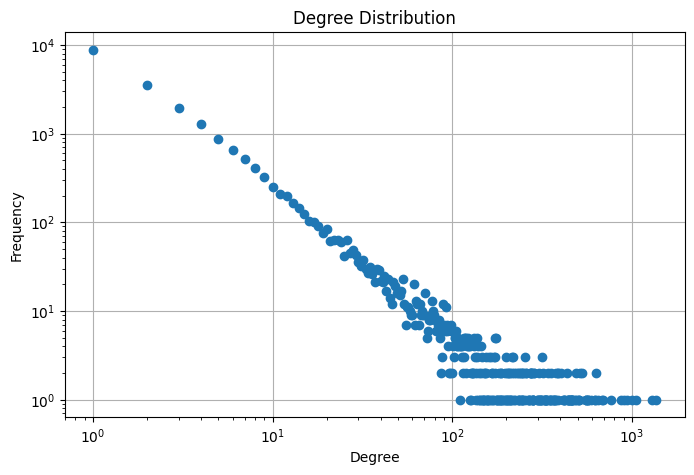

Average Local Clustering Coefficient: 0.1432
Global Clustering Coefficient (Transitivity): 0.0802


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Load space-separated text file with no header
df = pd.read_csv('/content/sx-mathoverflow.txt', sep=' ', header=None, names=['source', 'target', 'timestamp'])

# Convert temporal network to static by aggregating edges
edges = list(zip(df['source'], df['target']))
G = nx.Graph()
G.add_edges_from(edges)

# 1. Giant Component Size
giant_cc = max(nx.connected_components(G), key=len)
G_giant = G.subgraph(giant_cc)
giant_size = len(G_giant)
print(f"Giant Component Size: {giant_size}")

# 2. Mean Degree
degrees = dict(G.degree())
mean_degree = sum(degrees.values()) / len(degrees)
print(f"Mean Degree: {mean_degree:.4f}")

# 3. Degree Distribution
degree_count = Counter(degrees.values())
deg, cnt = zip(*sorted(degree_count.items()))
plt.figure(figsize=(8, 5))
plt.loglog(deg, cnt, marker='o', linestyle='None')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 4. Average Local Clustering Coefficient
avg_local_cc = nx.average_clustering(G)
print(f"Average Local Clustering Coefficient: {avg_local_cc:.4f}")

# 5. Global Clustering Coefficient (Transitivity)
global_cc = nx.transitivity(G)
print(f"Global Clustering Coefficient (Transitivity): {global_cc:.4f}")


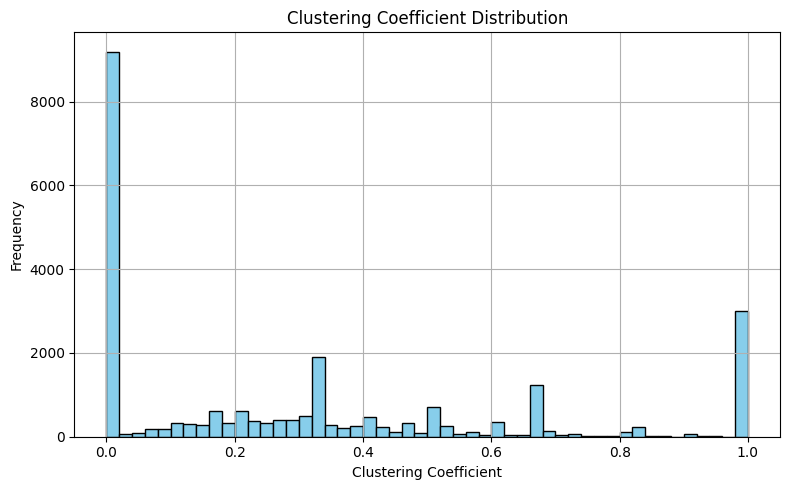

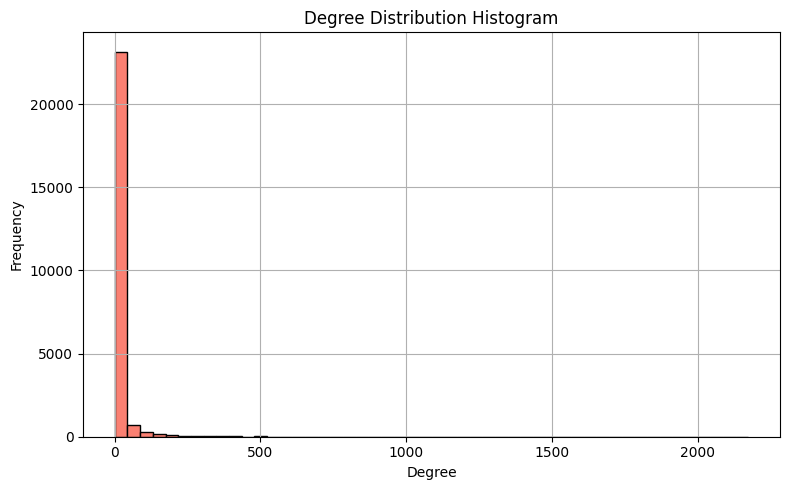

Top 10 Nodes by Degree:
Node: 290, Degree: 2174
Node: 11142, Degree: 2049
Node: 763, Degree: 1866
Node: 3684, Degree: 1578
Node: 1409, Degree: 1559
Node: 121, Degree: 1539
Node: 297, Degree: 1491
Node: 6094, Degree: 1419
Node: 2926, Degree: 1351
Node: 1946, Degree: 1310


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import Counter

df = pd.read_csv('sx-mathoverflow.txt', sep=' ', header=None, names=['source', 'target', 'timestamp'])

# Create undirected static graph from temporal edges
edges = list(zip(df['source'], df['target']))
G = nx.Graph()
G.add_edges_from(edges)

# Extract the giant component
giant_cc = max(nx.connected_components(G), key=len)
G_giant = G.subgraph(giant_cc).copy()

# 1. Plot Clustering Coefficient Distribution
clustering_coeffs = list(nx.clustering(G_giant).values())
plt.figure(figsize=(8, 5))
plt.hist(clustering_coeffs, bins=50, color='skyblue', edgecolor='black')
plt.title("Clustering Coefficient Distribution")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.savefig("clus_coeff_distribution.png")
plt.show()

# 2. Plot Degree Distribution Histogram
degrees = [d for n, d in G_giant.degree()]
plt.figure(figsize=(8, 5))
plt.hist(degrees, bins=50, color='salmon', edgecolor='black')
plt.title("Degree Distribution Histogram")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.savefig("degree_histogram.png")
plt.show()

# 4. Top 10 Nodes by Degree
top_10_nodes = sorted(G_giant.degree(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by Degree:")
for node, degree in top_10_nodes:
    print(f"Node: {node}, Degree: {degree}")
